# Netflix Recommendation System using Python

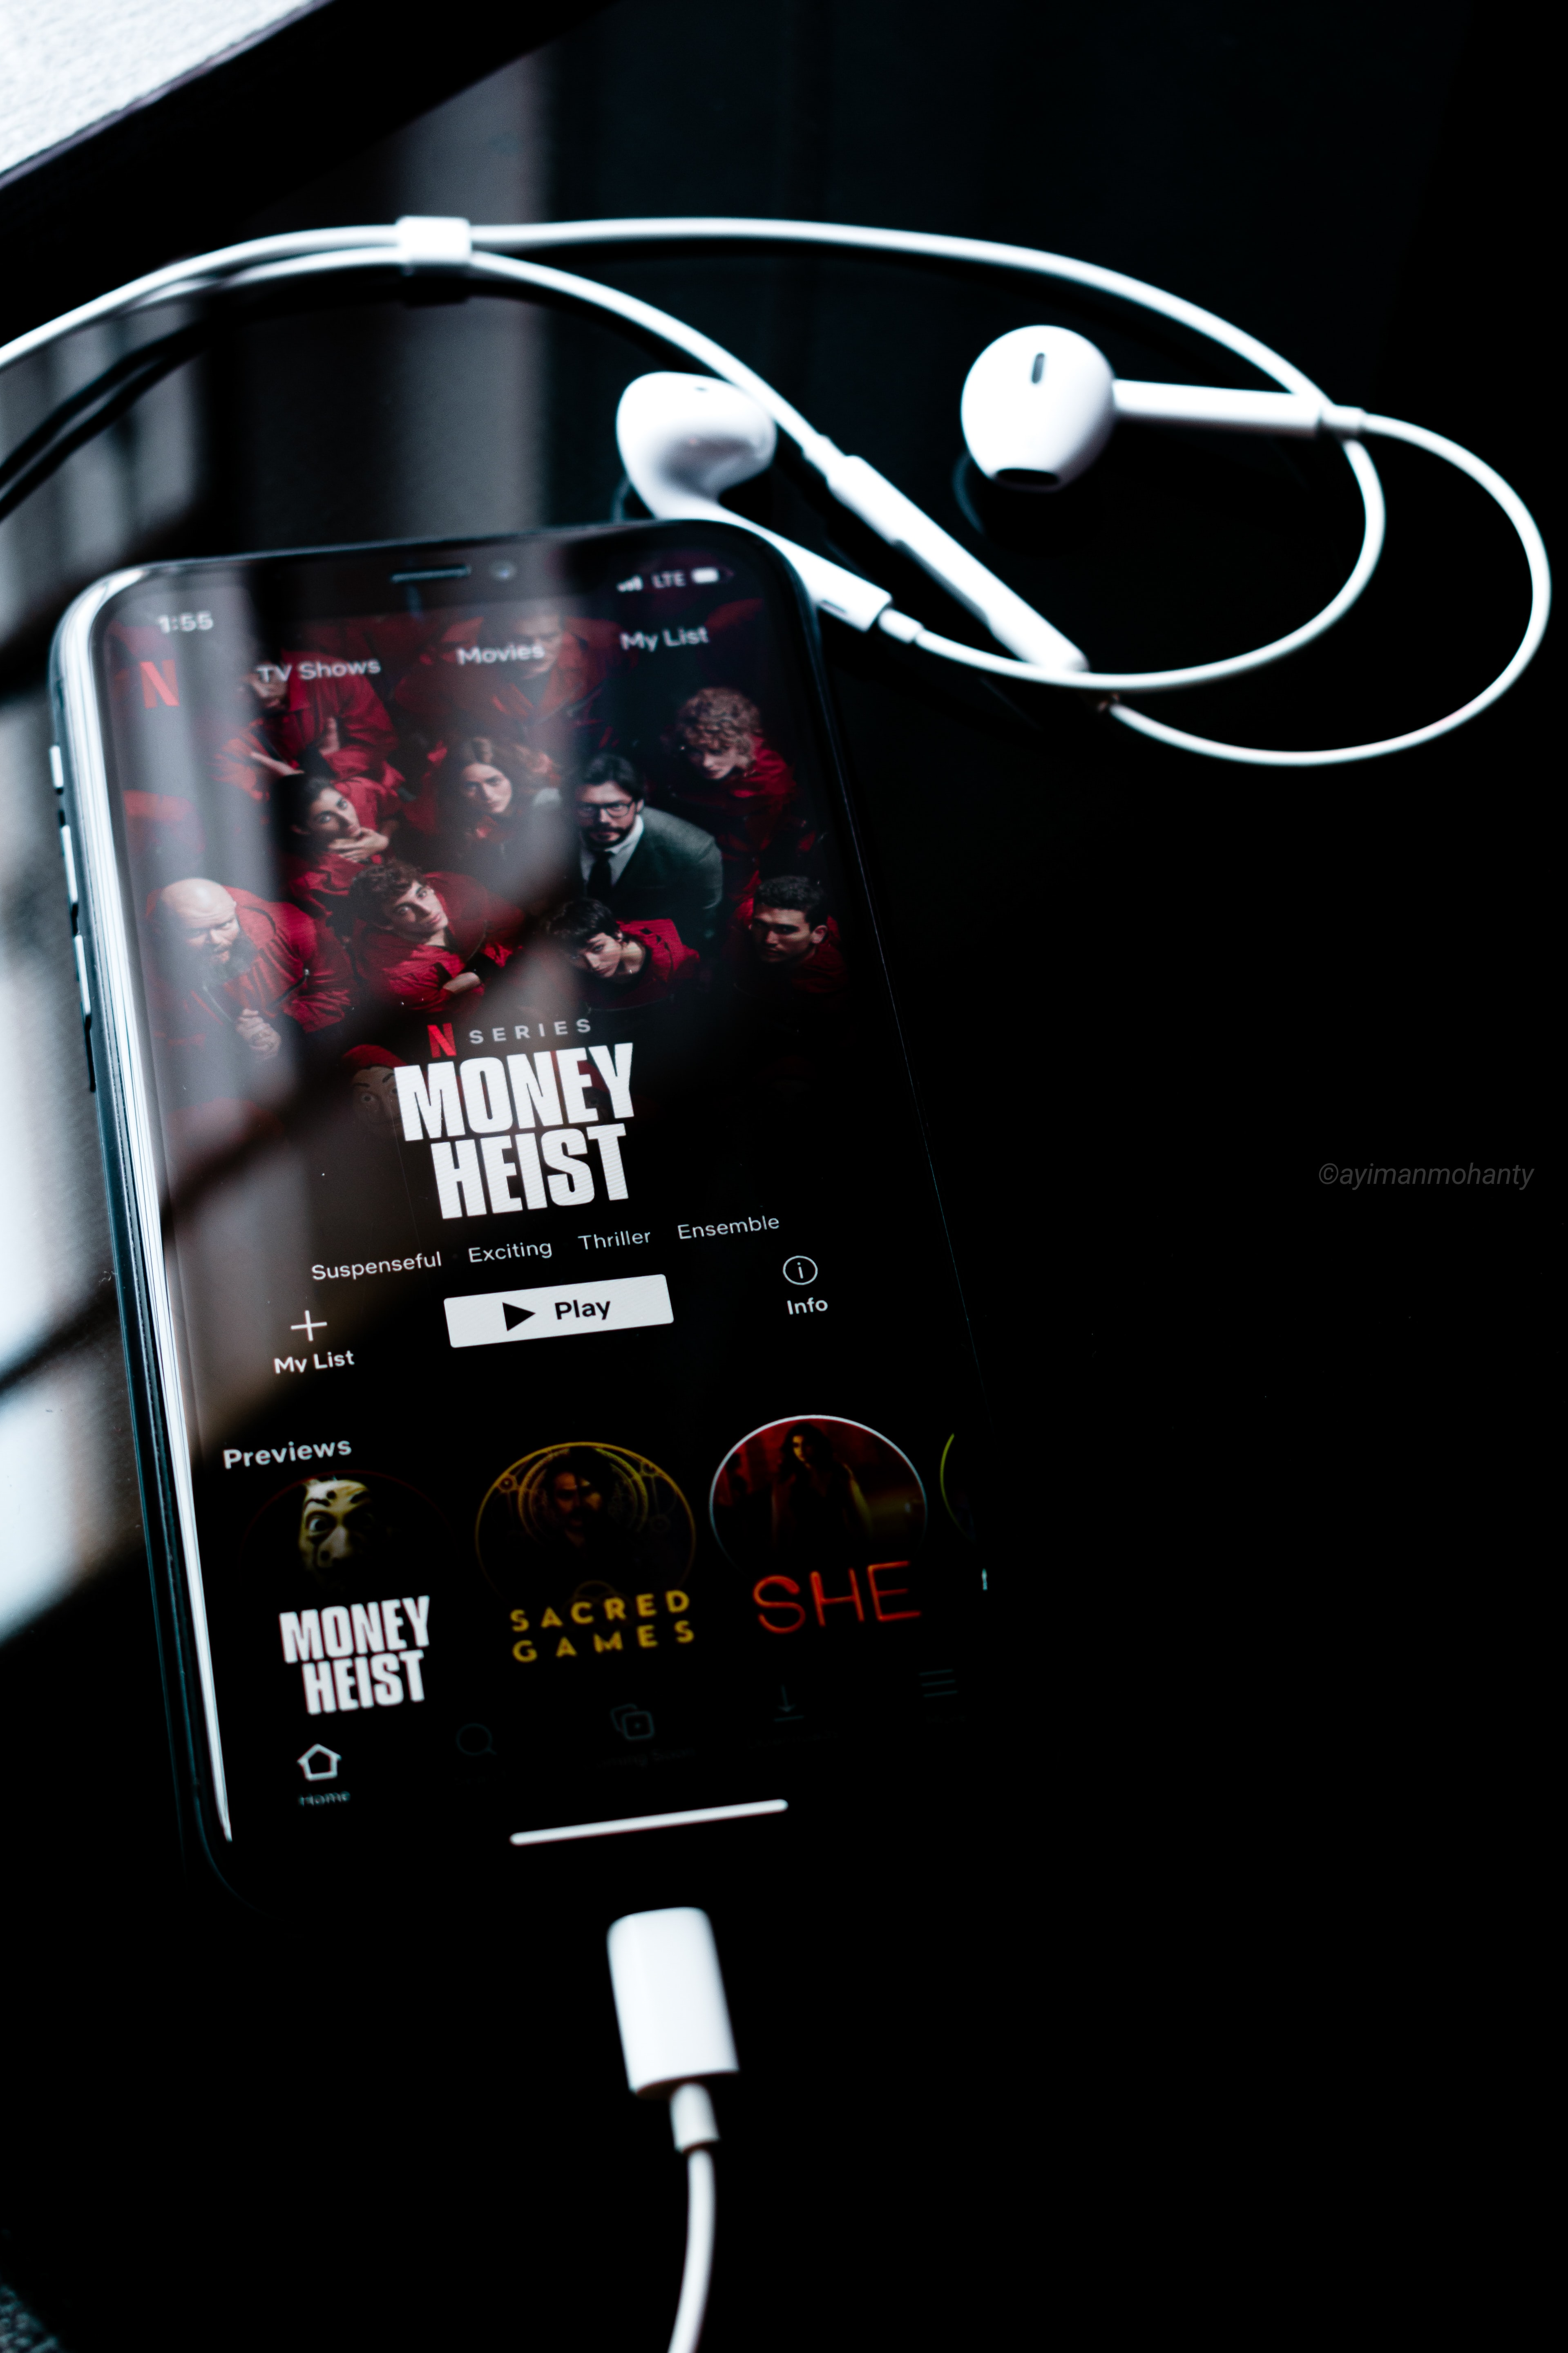

Netflix is a subscription-based streaming service that allows users to watch movies and television shows without interruptions. Netflix's recommendation system is one of the reasons for its popularity. Its recommendation system suggests movies and television shows based on the user's preferences.

How it is possible?
Netflix watch your

1.viewing history

2.viewing history of other users with similar tastes and preferences as yours

3.genres, category, description, and more information about the content that you watched in the past

Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
data = pd.read_csv("netflixData.csv")
print(data.head())

                                Show Id                          Title  \
0  cc1b6ed9-cf9e-4057-8303-34577fb54477                       (Un)Well   
1  e2ef4e91-fb25-42ab-b485-be8e3b23dedb                         #Alive   
2  b01b73b7-81f6-47a7-86d8-acb63080d525  #AnneFrank - Parallel Stories   
3  b6611af0-f53c-4a08-9ffa-9716dc57eb9c                       #blackAF   
4  7f2d4170-bab8-4d75-adc2-197f7124c070               #cats_the_mewvie   

                                         Description  \
0  This docuseries takes a deep dive into the luc...   
1  As a grisly virus rampages a city, a lone man ...   
2  Through her diary, Anne Frank's story is retol...   
3  Kenya Barris and his family navigate relations...   
4  This pawesome documentary explores how our fel...   

                      Director  \
0                          NaN   
1                       Cho Il   
2  Sabina Fedeli, Anna Migotto   
3                          NaN   
4             Michael Margolis   

             

Title column needs preprocessing as it contains # before the name of the movies, also check whether the data contains null values

In [5]:
print(data.isnull().sum())

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64


The dataset contains null values

select the columns that we can use to build a Netflix recommendation system:

In [6]:
data = data[["Title", "Description", "Content Type", "Genres"]]
print(data.head())

                           Title  \
0                       (Un)Well   
1                         #Alive   
2  #AnneFrank - Parallel Stories   
3                       #blackAF   
4               #cats_the_mewvie   

                                         Description Content Type  \
0  This docuseries takes a deep dive into the luc...      TV Show   
1  As a grisly virus rampages a city, a lone man ...        Movie   
2  Through her diary, Anne Frank's story is retol...        Movie   
3  Kenya Barris and his family navigate relations...      TV Show   
4  This pawesome documentary explores how our fel...        Movie   

                                           Genres  
0                                      Reality TV  
1  Horror Movies, International Movies, Thrillers  
2             Documentaries, International Movies  
3                                     TV Comedies  
4             Documentaries, International Movies  


In [7]:
data = data.dropna()

In [8]:
print(data.head())

                           Title  \
0                       (Un)Well   
1                         #Alive   
2  #AnneFrank - Parallel Stories   
3                       #blackAF   
4               #cats_the_mewvie   

                                         Description Content Type  \
0  This docuseries takes a deep dive into the luc...      TV Show   
1  As a grisly virus rampages a city, a lone man ...        Movie   
2  Through her diary, Anne Frank's story is retol...        Movie   
3  Kenya Barris and his family navigate relations...      TV Show   
4  This pawesome documentary explores how our fel...        Movie   

                                           Genres  
0                                      Reality TV  
1  Horror Movies, International Movies, Thrillers  
2             Documentaries, International Movies  
3                                     TV Comedies  
4             Documentaries, International Movies  


text preprocessing

In [10]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Title"] = data["Title"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
print(data.Title.sample(10))

1184        daniel sloss live show
1850                     god eater
2205                     hadnt met
555                          barri
992              chris tucker live
3944                     rich love
4192                        sexifi
3305           schoolmat barbarian
4129    sebastian maniscalco would
5407                  boy i'v love
Name: Title, dtype: object


use the Genres column as the feature to recommend similar content to the user. I will use the concept of cosine similarity here 

In [13]:
feature = data["Genres"].tolist()
tfidf = text.TfidfVectorizer(input=feature, stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

set the Title column as an index so that we can find similar content by giving the title of the movie or TV show as an input:

In [14]:
indices = pd.Series(data.index, 
                    index=data['Title']).drop_duplicates()

function to recommend Movies and TV shows on Netflix:

In [28]:
def netFlix_recommendation(title, similarity = similarity):
    index = indices[title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    movieindices = [i[0] for i in similarity_scores]
    return data['Title'].iloc[movieindices]
print(netFlix_recommendation("god eater"))

79                             
171                        aico
223                  aggretsuko
241              ajin demihuman
365                  angel beat
444                attack titan
502    back street girl gokudol
522                        baki
569                     beastar
689                black butler
Name: Title, dtype: object


for 'god eater' , the system recomment 'aico','aggretsuko','angel beat','attack titan','back street girl gokudol','baki','beastar','black butler' with movie indices.